In [ ]:
#Traffic Prediction with limited data (Congestion level)

In [ ]:
#Project Description#
#This program creates a synthetic dataset of traffic data, preprocesses it by encoding categorical variables and normalizing features, then splits it into training and testing sets.
#It builds a neural network model to predict traffic congestion levels, trains the model, and evaluates its performance.
#Additionally, it includes code to visualize the traffic congestion levels and explore the dataset.
#The model can make predictions based on new input data.

In [ ]:
!pip install tensorflow pandas numpy scikit-learn

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3542 - loss: 1.1129 - val_accuracy: 0.3812 - val_loss: 1.1011
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3513 - loss: 1.1059 - val_accuracy: 0.3625 - val_loss: 1.1005
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3785 - loss: 1.0952 - val_accuracy: 0.3375 - val_loss: 1.1013
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3468 - loss: 1.0942 - val_accuracy: 0.3438 - val_loss: 1.1010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3827 - loss: 1.0907 - val_accuracy: 0.3250 - val_loss: 1.1070
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4115 - loss: 1.0844 - val_accuracy: 0.3375 - val_loss: 1.1050
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4095 - loss: 1.0838 - val_accuracy: 0.3250 - val_loss: 1.1001
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4284 - loss: 1.0809 - val_accuracy: 0.3438 - val_loss: 1.1045
Epo

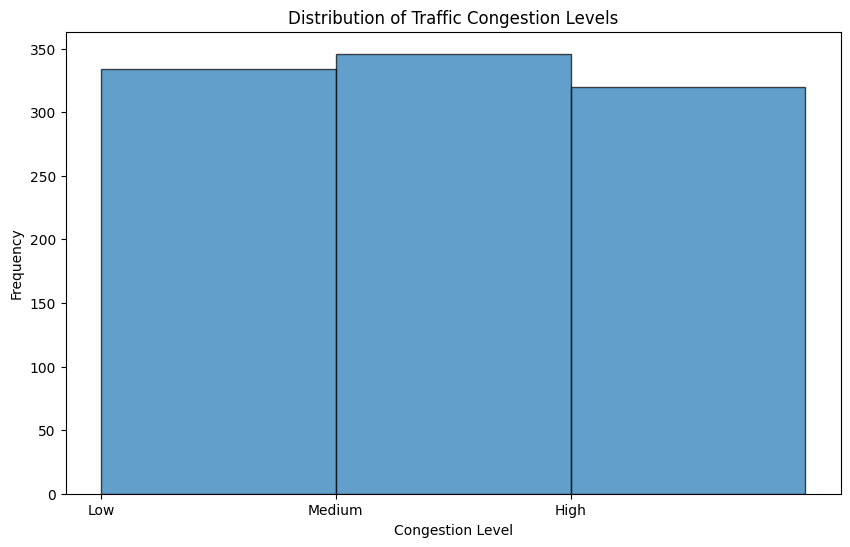

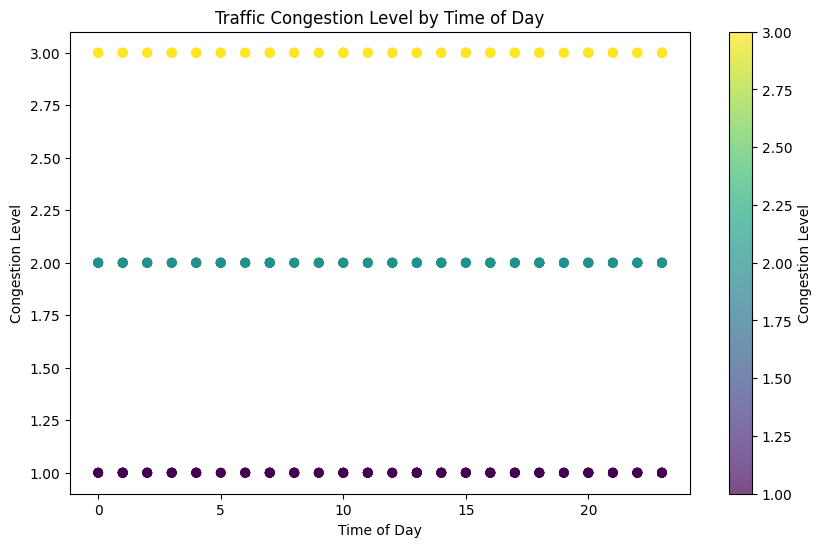

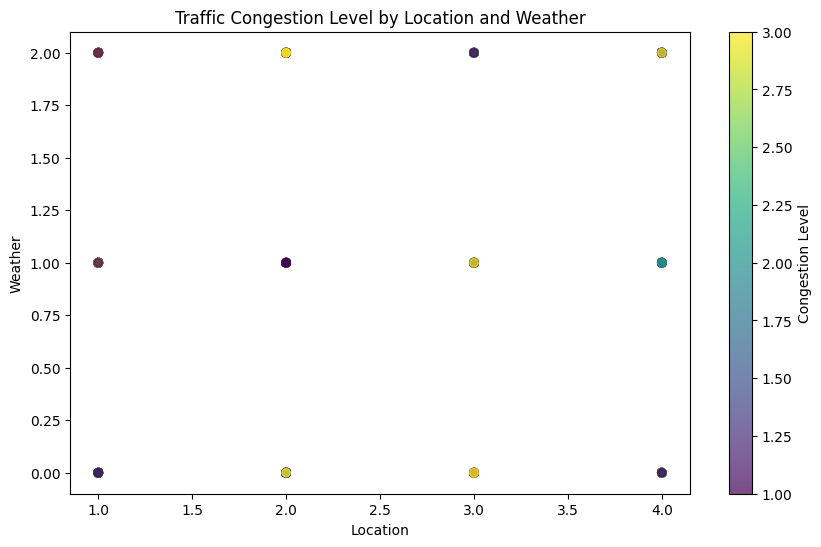

In [1]:
 import numpy as np
 import pandas as pd
 import tensorflow as tf
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler, LabelEncoder
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 import matplotlib.pyplot as plt

 # Step 1: Create or Load Dataset
 data = {
     'Time': np.random.randint(0, 24, 1000), # Hour of the day
     'Location': np.random.randint(1, 5, 1000), # Location IDs (1-4)
     'Weather': np.random.choice(['Sunny', 'Rainy', 'Cloudy'], 1000), # Weather conditions
     'Congestion_Level': np.random.choice([1, 2, 3], 1000) # 1=Low, 2=Medium, 3=High
 }

 df = pd.DataFrame(data)

 # Encode categorical data (Weather)
 encoder = LabelEncoder()
 df['Weather'] = encoder.fit_transform(df['Weather']) # Sunny=2, Rainy=1, Cloudy=0

 # Features (X) and Target (y)
 X = df[['Time', 'Location', 'Weather']].values
 y = df['Congestion_Level'].values

 # Normalize the features
 scaler = StandardScaler()
 X = scaler.fit_transform(X)

 # One-hot encode the target for classification
 y = tf.keras.utils.to_categorical(y - 1, num_classes=3) # Convert to 0, 1, 2

 # Split the data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Step 3: Build the Neural Network Model
 model = Sequential([
     Dense(32, input_dim=3, activation='relu'), # Input layer (3 features)
     Dense(16, activation='relu'), # Hidden layer
     Dense(3, activation='softmax') # Output layer (3 classes)
 ])

 # Compile the model
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

 # Step 4: Train the Model
 history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

 # Step 5: Evaluate the Model
 loss, accuracy = model.evaluate(X_test, y_test)
 print(f"Test Loss: {loss}")
 print(f"Test Accuracy: {accuracy}")

 # Step 6: Make Predictions
 example_input = np.array([[8, 2, 0]]) # 8 AM, Location 2, Weather=Cloudy
 example_input = scaler.transform(example_input) # Normalize
 predicted = model.predict(example_input)
 predicted_class = np.argmax(predicted) + 1 # Convert back to class
 print(f"Predicted Traffic Congestion Level: {predicted_class}")

 # Visualization Code
 # Plot Congestion Level Distribution
 plt.figure(figsize=(10, 6))
 plt.hist(df['Congestion_Level'], bins=[1, 2, 3, 4], edgecolor='black', alpha=0.7)
 plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
 plt.xlabel('Congestion Level')
 plt.ylabel('Frequency')
 plt.title('Distribution of Traffic Congestion Levels')
 plt.show()

 # Plot Congestion Level by Time of Day
 plt.figure(figsize=(10, 6))
 plt.scatter(df['Time'], df['Congestion_Level'], c=df['Congestion_Level'], cmap='viridis', alpha=0.7)
 plt.colorbar(label='Congestion Level')
 plt.xlabel('Time of Day')
 plt.ylabel('Congestion Level')
 plt.title('Traffic Congestion Level by Time of Day')
 plt.show()

 # Plot Congestion Level by Location and Weather
 plt.figure(figsize=(10, 6))
 plt.scatter(df['Location'], df['Weather'], c=df['Congestion_Level'], cmap='viridis', alpha=0.7)
 plt.colorbar(label='Congestion Level')
 plt.xlabel('Location')
 plt.ylabel('Weather')
 plt.title('Traffic Congestion Level by Location and Weather')
 plt.show()

In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/traffic.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

# Get a summary of the dataframe
print(df.info())

           DateTime  Junction  Vehicles           ID
0  01-11-2015 00:00         1        15  20151101001
1  01-11-2015 01:00         1        13  20151101011
2  01-11-2015 02:00         1        10  20151101021
3  01-11-2015 03:00         1         7  20151101031
4  01-11-2015 04:00         1         9  20151101041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
file_path = '/content/traffic.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 3: Explore the dataset
# Display the first few rows of the dataframe
print(df.head())

# Get a summary of the dataframe
print(df.info())


           DateTime  Junction  Vehicles           ID
0  01-11-2015 00:00         1        15  20151101001
1  01-11-2015 01:00         1        13  20151101011
2  01-11-2015 02:00         1        10  20151101021
3  01-11-2015 03:00         1         7  20151101031
4  01-11-2015 04:00         1         9  20151101041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
for chunk in pd.read_csv(file_path, chunksize=10000):
    # Process each chunk
    print(chunk.head())

           DateTime  Junction  Vehicles           ID
0  01-11-2015 00:00         1        15  20151101001
1  01-11-2015 01:00         1        13  20151101011
2  01-11-2015 02:00         1        10  20151101021
3  01-11-2015 03:00         1         7  20151101031
4  01-11-2015 04:00         1         9  20151101041
               DateTime  Junction  Vehicles           ID
10000  21-12-2016 16:00         1        72  20161221161
10001  21-12-2016 17:00         1        70  20161221171
10002  21-12-2016 18:00         1        79  20161221181
10003  21-12-2016 19:00         1        79  20161221191
10004  21-12-2016 20:00         1        79  20161221201
               DateTime  Junction  Vehicles           ID
20000  13-06-2016 08:00         2         7  20160613082
20001  13-06-2016 09:00         2        11  20160613092
20002  13-06-2016 10:00         2        12  20160613102
20003  13-06-2016 11:00         2        14  20160613112
20004  13-06-2016 12:00         2        17  2016061312